# 📈 Time Series Forecasting Using Prophet (Live Data Simulation)

## 🔹 What is the Data:

The dataset used in this experiment is the **Airline Passengers dataset**, which contains the monthly total number of international airline passengers from 1949 to 1960.  
This data is a classic time series dataset used to demonstrate forecasting techniques with trend and seasonality.

- **X-axis (Time / Date):** Month and Year  
- **Y-axis (Passengers):** Number of airline passengers  


## 🔹 What Does This Model Do:

This experiment uses the Prophet model to:

- Learn the **trend** and **seasonal patterns** in the passenger data  
- Forecast the **future number of passengers**  
- Demonstrate how forecasts change when **new live data is added**  

This approach is useful for real-world applications such as:
- Traffic forecasting  
- Sales prediction  
- Demand forecasting  
- Business planning  


## 🔹 Our Objective:

To perform time series forecasting using Prophet and observe how predictions change when new (live) data is added to the dataset.


## 🔹 Algorithm Used:

Prophet is a forecasting model developed by Meta that models time series data using:
- Trend component  
- Seasonal components  
- Holiday effects (optional)


## 🔹 Outcome:

- A forecast graph showing historical data and future predictions  
- A second forecast graph after adding new live data  
- Proper visualization with labeled axes and titles  



c:\Users\NEEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:18:57 - cmdstanpy - INFO - Chain [1] start processing
21:18:57 - cmdstanpy - INFO - Chain [1] done processing


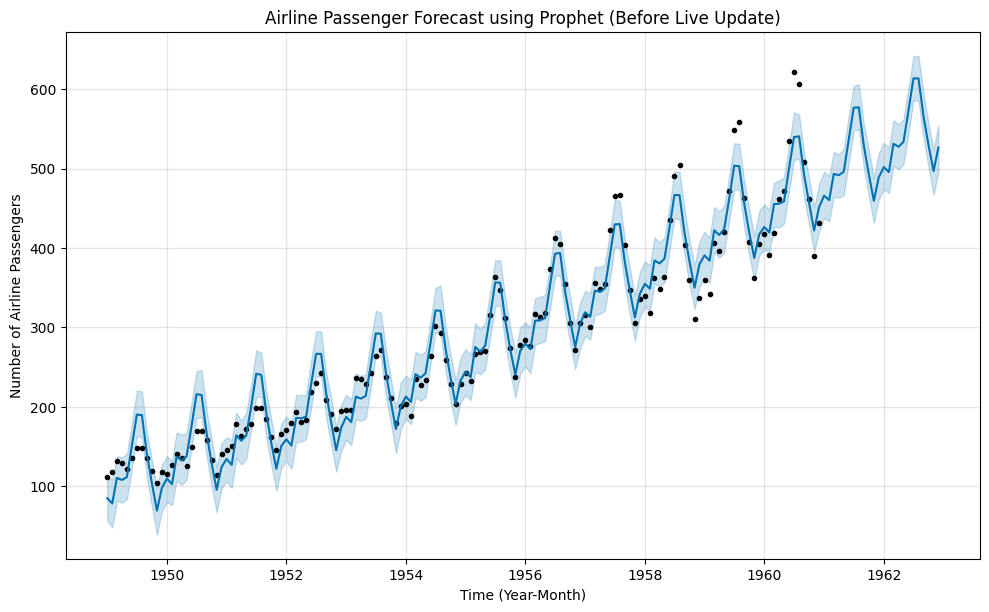

21:18:57 - cmdstanpy - INFO - Chain [1] start processing
21:18:57 - cmdstanpy - INFO - Chain [1] done processing


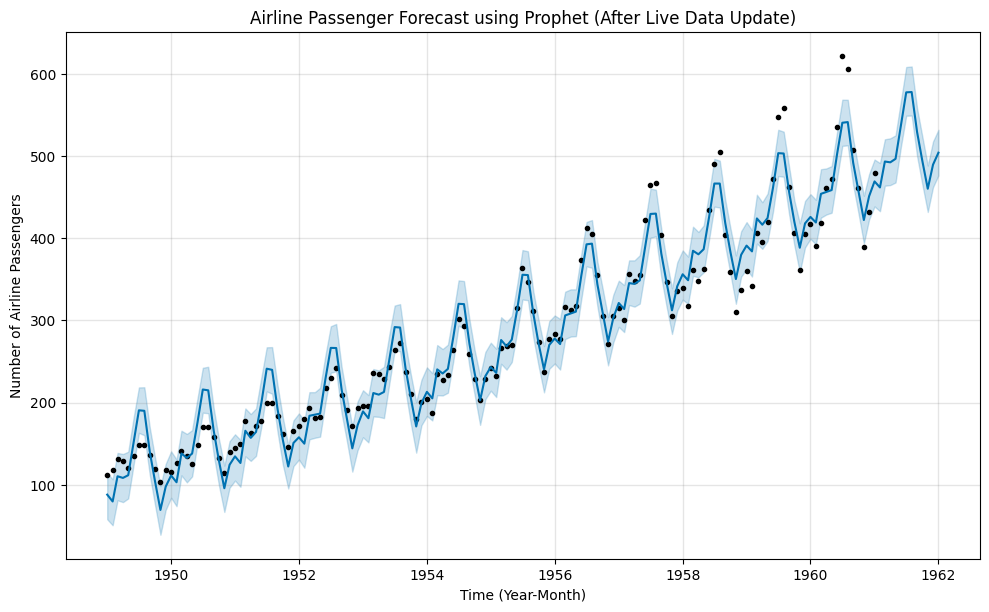

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Dataset URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

df.columns = ["ds", "y"]

df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

model = Prophet()
model.fit(df)

# Forecast Future (Next 24 Months)
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)

# Plot Forecast (Before Live Update)
fig1 = model.plot(forecast)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Airline Passengers")
plt.title("Airline Passenger Forecast using Prophet (Before Live Update)")
plt.show()

# Simulate Live Data Update
new_row = pd.DataFrame({
    "ds": [pd.to_datetime("1961-01-01")],
    "y": [480]
})

df_live = pd.concat([df, new_row], ignore_index=True)

model_live = Prophet()
model_live.fit(df_live)

future_live = model_live.make_future_dataframe(periods=12, freq='MS')
forecast_live = model_live.predict(future_live)

# Plot Forecast (After Live Update)
fig2 = model_live.plot(forecast_live)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Airline Passengers")
plt.title("Airline Passenger Forecast using Prophet (After Live Data Update)")
plt.show()